# Analiza danych
Krótki notatnik do eksploracji zbioru treningowego i szybkiego testowania modeli

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-darkgrid')

In [2]:
# Wczytaj dane z pliku ../data/train.csv w najprostszy sposób
DATA_PATH = Path("../data/train.csv")
print("Wczytano dane z pliku: ../data/train.csv")
data = pd.read_csv(DATA_PATH)
data.head()


Wczytano dane z pliku: ../data/train.csv


,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


In [3]:
data.loc[data['Body_Temp'].idxmax()]


id             5589
Sex            male
Age              63
Height        168.0
Weight         76.0
Duration       29.0
Heart_Rate    116.0
Body_Temp      41.5
Calories      268.0
Name: 5589, dtype: object

In [4]:
print(f"Wczytano {data.shape[0]} wierszy oraz {data.shape[1]} kolumn")


Wczytano 750000 wierszy oraz 9 kolumn


In [5]:
data.dtypes.to_frame('dtype')


,dtype
id,int64
Sex,object
Age,int64
Height,float64
Weight,float64
Duration,float64
Heart_Rate,float64
Body_Temp,float64
Calories,float64


In [6]:
missing = data.isna().sum()
missing[missing > 0] if missing.sum() else print('Brak brakujących wartości')


Brak brakujących wartości


In [7]:
numeric_summary = data.describe().T
numeric_summary[['mean', 'std', 'min', 'max']]


,mean,std,min,max
id,374999.500000,216506.495284,0.0,749999.0
Age,41.420404,15.175049,20.0,79.0
Height,174.697685,12.824496,126.0,222.0
Weight,75.145668,13.982704,36.0,132.0
Duration,15.421015,8.354095,1.0,30.0
Heart_Rate,95.483995,9.449845,67.0,128.0
Body_Temp,40.036253,0.779875,37.1,41.5
Calories,88.282781,62.395349,1.0,314.0


Text(0, 0.5, 'Liczba próbek')

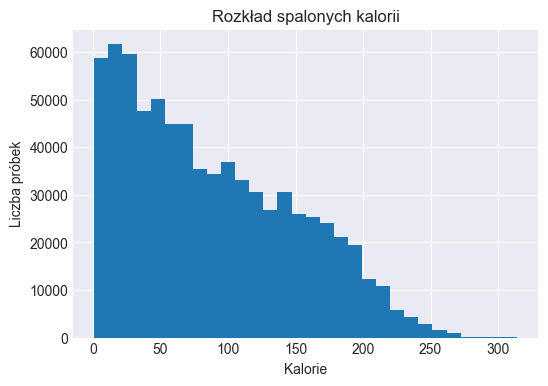

In [8]:
plt.figure(figsize=(6, 4))
data['Calories'].hist(bins=30)
plt.title('Rozkład spalonych kalorii')
plt.xlabel('Kalorie')
plt.ylabel('Liczba próbek')


In [9]:
corr = data.corr(numeric_only=True)['Calories'].sort_values(ascending=False)
corr


Calories      1.000000
Duration      0.959908
Heart_Rate    0.908748
Body_Temp     0.828671
Age           0.145683
Weight        0.015863
id            0.001148
Height       -0.004026
Name: Calories, dtype: float64

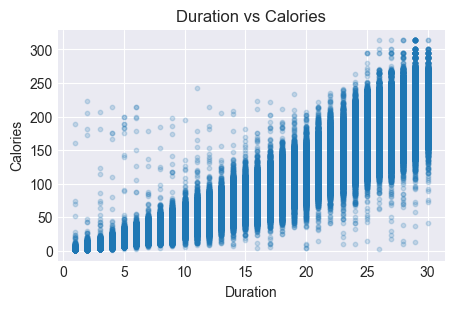

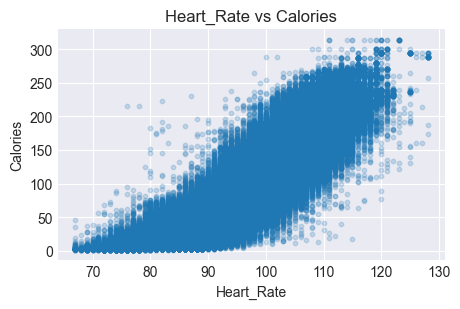

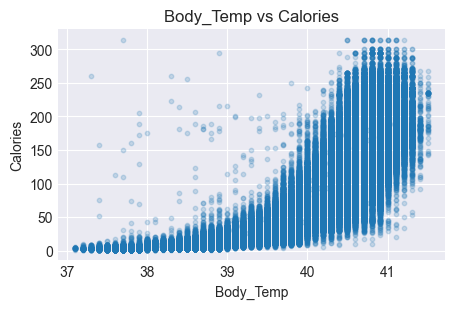

In [10]:
feature_cols = ['Duration', 'Heart_Rate', 'Body_Temp']

for col in feature_cols:
    plt.figure(figsize=(5, 3))
    plt.scatter(data[col], data['Calories'], alpha=0.2, s=10)
    plt.title(f'{col} vs Calories')
    plt.xlabel(col)
    plt.ylabel('Calories')


In [11]:
calories_by_sex = data.groupby('Sex')['Calories'].agg(['mean', 'count'])
calories_by_sex


,mean,count
Sex,,
female,87.534761,375721
male,89.033683,374279


In [12]:
# Analiza brakujących danych (sprawdzenie nulli)
missing_values = data.isnull().sum()
print("Liczba brakujących wartości w każdej kolumnie:")
print(missing_values)

# Wizualizacja brakujących danych (jeśli są jakiekolwiek braki)
if missing_values.any():
    plt.figure(figsize=(8, 4))
    missing_values[missing_values > 0].plot(kind='bar')
    plt.title('Brakujące wartości w kolumnach')
    plt.ylabel('Liczba brakujących wartości')
    plt.xlabel('Kolumna')
    plt.show()
else:
    print("Brak brakujących wartości w danych.")



Liczba brakujących wartości w każdej kolumnie:
id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64
Brak brakujących wartości w danych.


In [44]:
# Podsumowanie kluczowych obserwacji
print("=== Wnioski dla treningu modelu ===\n")

print("1. Najsilniejsze korelacje z Calories:")
top_corr = corr.drop('Calories').head(3)
for feature, corr_val in top_corr.items():
    print(f"   - {feature}: {corr_val:.3f}")

print(f"\n2. Różnica w kaloriach między płciami:")
sex_diff = calories_by_sex.loc['male', 'mean'] - calories_by_sex.loc['female', 'mean']
print(f"   Mężczyźni spalają średnio {sex_diff:.1f} kalorii więcej niż kobiety")

print(f"\n3. Zakres wartości celu (Calories):")
print(f"   Min: {data['Calories'].min():.1f}, Max: {data['Calories'].max():.1f}")
print(f"   Średnia: {data['Calories'].mean():.1f}, Mediana: {data['Calories'].median():.1f}")



=== Wnioski dla treningu modelu ===

1. Najsilniejsze korelacje z Calories:
   - Duration: 0.960
   - Heart_Rate: 0.909
   - Body_Temp: 0.829

2. Różnica w kaloriach między płciami:
   Mężczyźni spalają średnio 1.5 kalorii więcej niż kobiety

3. Zakres wartości celu (Calories):
   Min: 1.0, Max: 314.0
   Średnia: 88.3, Mediana: 77.0


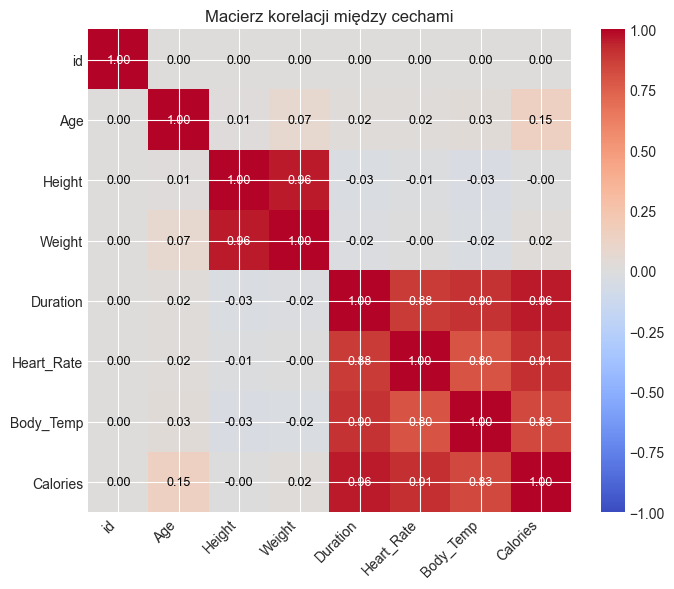

In [14]:
corr_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
im = plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)

plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(ticks=range(len(corr_matrix.columns)), labels=corr_matrix.columns, rotation=45, ha='right')
plt.yticks(ticks=range(len(corr_matrix.index)), labels=corr_matrix.index)

for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.index)):
        plt.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}", 
                 ha="center", va="center", color="black" if abs(corr_matrix.iloc[i,j]) < 0.5 else "white", fontsize=9)

plt.title('Macierz korelacji między cechami')
plt.tight_layout()
plt.show()


<Figure size 600x400 with 0 Axes>

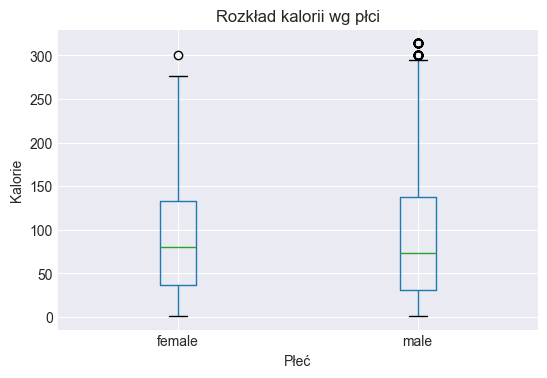

In [ ]:
plt.figure(figsize=(6, 4))
data.boxplot(column='Calories', by='Sex', figsize=(6, 4))
plt.title('Rozkład kalorii wg płci')
plt.suptitle('')  # usuwa domyślny tytuł
plt.xlabel('Płeć')
plt.ylabel('Kalorie')
plt.show()


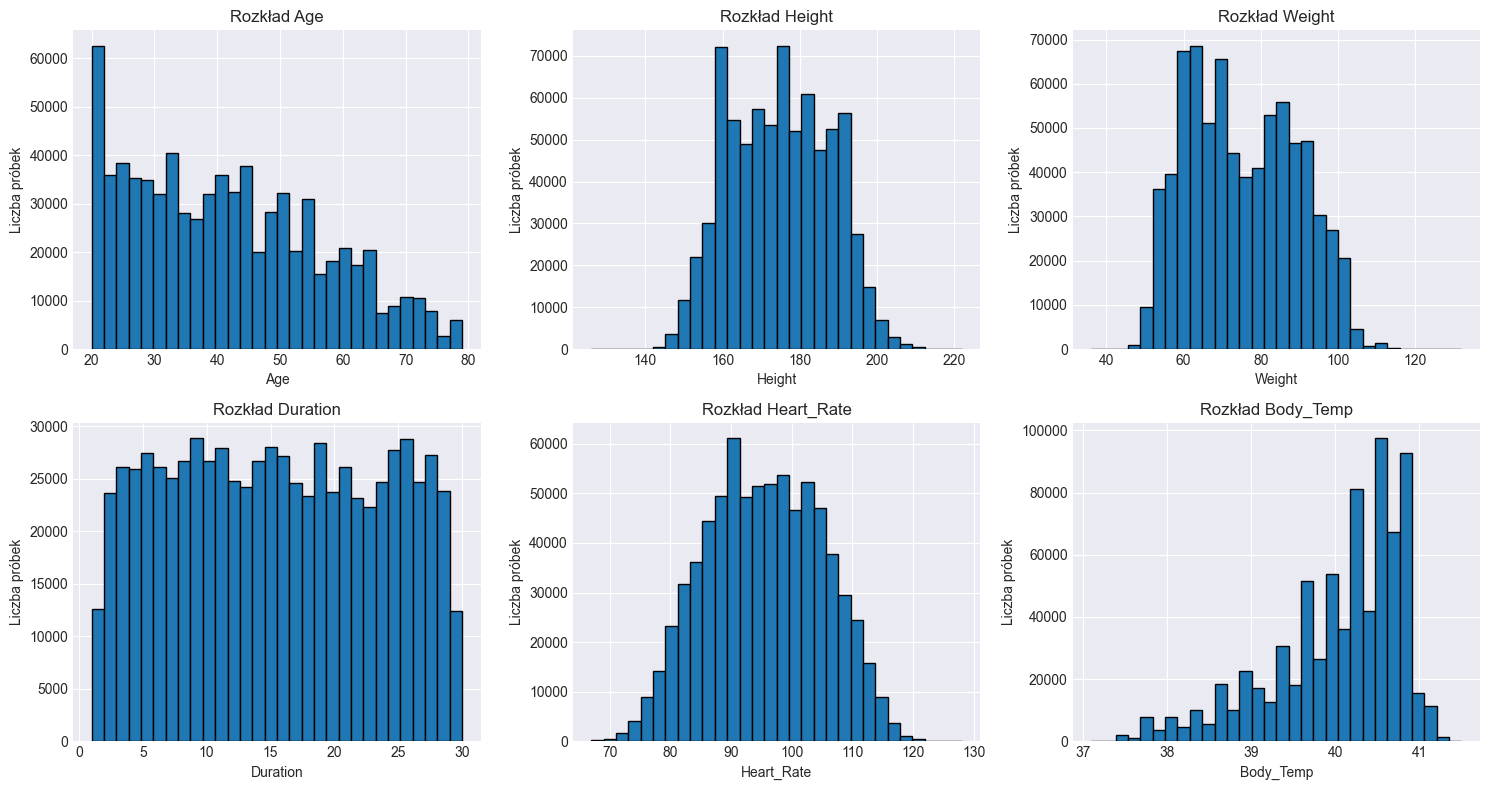

In [ ]:
numeric_features = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

for i, col in enumerate(numeric_features):
    axes[i].hist(data[col], bins=30, edgecolor='black')
    axes[i].set_title(f'Rozkład {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Liczba próbek')

plt.tight_layout()
plt.show()


In [19]:
# Definiuj numeric_features jeśli jeszcze nie istnieje, zanim obliczysz statystyki
if "numeric_features" not in locals():
    numeric_features = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']

# Wyświetl podstawowe statystyki rozkładów cech numerycznych
stats = data[numeric_features + ['Calories']].describe()
print("Statystyki rozkładów dla cech numerycznych:")
print(stats)

# Policz dodatkowo skośność (skewness) i kurtozę (kurtosis)
skewness = data[numeric_features + ['Calories']].skew()
kurtosis = data[numeric_features + ['Calories']].kurtosis()

print("\nSkośność (skewness):")
print(skewness)

print("\nKurtoza (kurtosis):")
print(kurtosis)

Statystyki rozkładów dla cech numerycznych:
                 Age         Height         Weight       Duration  \
count  750000.000000  750000.000000  750000.000000  750000.000000   
mean       41.420404     174.697685      75.145668      15.421015   
std        15.175049      12.824496      13.982704       8.354095   
min        20.000000     126.000000      36.000000       1.000000   
25%        28.000000     164.000000      63.000000       8.000000   
50%        40.000000     174.000000      74.000000      15.000000   
75%        52.000000     185.000000      87.000000      23.000000   
max        79.000000     222.000000     132.000000      30.000000   

          Heart_Rate      Body_Temp       Calories  
count  750000.000000  750000.000000  750000.000000  
mean       95.483995      40.036253      88.282781  
std         9.449845       0.779875      62.395349  
min        67.000000      37.100000       1.000000  
25%        88.000000      39.600000      34.000000  
50%        95.00

In [21]:
from sklearn.model_selection import train_test_split

# Podział danych na zbiór treningowy i walidacyjny
# 80% trening, 20% walidacja
train_data, val_data = train_test_split(
    data, 
    test_size=0.2, 
    random_state=42,
    shuffle=True
)

print(f"Zbiór treningowy: {len(train_data)} próbek ({len(train_data)/len(data)*100:.1f}%)")
print(f"Zbiór walidacyjny: {len(val_data)} próbek ({len(val_data)/len(data)*100:.1f}%)")

# Sprawdź rozkład celu w obu zbiorach
print(f"\nŚrednia kalorii w zbiorze treningowym: {train_data['Calories'].mean():.2f}")
print(f"Średnia kalorii w zbiorze walidacyjnym: {val_data['Calories'].mean():.2f}")
print(f"Różnica: {abs(train_data['Calories'].mean() - val_data['Calories'].mean()):.2f}")


Zbiór treningowy: 600000 próbek (80.0%)
Zbiór walidacyjny: 150000 próbek (20.0%)

Średnia kalorii w zbiorze treningowym: 88.30
Średnia kalorii w zbiorze walidacyjnym: 88.22
Różnica: 0.08


In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import numpy as np

# Przygotowanie danych do treningu (używamy małej próbki dla szybkości)
sample_size = 10000
train_sample = train_data.sample(n=min(sample_size, len(train_data)), random_state=42)

# Poprawiamy kod: konwersja kolumny 'Sex' do wartości liczbowych
def sex_to_num(x):
    if x == 'male':
        return 1.0
    elif x == 'female':
        return 0.0
    else:
        return float('nan')

for df in [train_sample, val_data]:
    # Jeżeli kolumna 'Sex' nie jest typu float, spróbuj przekonwertować
    if df['Sex'].dtype == object or str(df['Sex'].dtype).startswith('category'):
        df['Sex'] = df['Sex'].map(sex_to_num).astype(float)

# Przygotowanie cech i celu
features = ['Sex', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']
X_train = torch.tensor(train_sample[features].values, dtype=torch.float32)
y_train = torch.tensor(train_sample['Calories'].values, dtype=torch.float32).view(-1, 1)
X_val = torch.tensor(val_data[features].values, dtype=torch.float32)
y_val = torch.tensor(val_data['Calories'].values, dtype=torch.float32).view(-1, 1)

# Normalizacja (min-max)
X_train_min = X_train.min(dim=0, keepdim=True)[0]
X_train_max = X_train.max(dim=0, keepdim=True)[0]
X_train_norm = (X_train - X_train_min) / (X_train_max - X_train_min + 1e-8)
X_val_norm = (X_val - X_train_min) / (X_train_max - X_train_min + 1e-8)

print(f"Przygotowano dane: {len(X_train_norm)} próbek treningowych, {len(X_val_norm)} walidacyjnych")


Przygotowano dane: 10000 próbek treningowych, 150000 walidacyjnych


In [32]:
# Funkcja straty RMSLE
class RMSLELoss(nn.Module):
    def __init__(self):
        super().__init__()
        self.mse = nn.MSELoss()
    
    def forward(self, pred, actual):
        return torch.sqrt(self.mse(torch.log(pred + 1), torch.log(actual + 1)))

# Funkcja do treningu modelu
def train_model(model, X_train, y_train, X_val, y_val, epochs=20, lr=0.001, batch_size=64, momentum=0.9):
    criterion = RMSLELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)
    
    train_dataset = TensorDataset(X_train, y_train)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    
    best_val_rmsle = float('inf')
    
    for epoch in range(epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            pred = model(X_batch)
            loss = criterion(pred, y_batch)
            loss.backward()
            optimizer.step()
        
        # Ewaluacja na zbiorze walidacyjnym
        model.eval()
        with torch.no_grad():
            val_pred = model(X_val)
            val_rmsle = criterion(val_pred, y_val).item()
            if val_rmsle < best_val_rmsle:
                best_val_rmsle = val_rmsle
    
    return best_val_rmsle


In [33]:
# Porównanie różnych architektur i hiperparametrów
results = []

# Różne architektury sieci
architectures = [
    ("7->8->4->1", [7, 8, 4, 1]),  # obecna
    ("7->16->8->1", [7, 16, 8, 1]),
    ("7->32->16->1", [7, 32, 16, 1]),
    ("7->64->32->1", [7, 64, 32, 1]),
    ("7->16->1", [7, 16, 1]),  # prostsza
]

# Różne learning rates, batch sizes i momentums
learning_rates = [0.001, 0.01, 0.0001]
batch_sizes = [32, 64, 128]
momentums = [0.5, 0.9, 0.95]

print("Trening modeli...")
print("-" * 80)
total = len(architectures) * len(learning_rates) * len(batch_sizes) * len(momentums)
current = 0

for arch_name, layers in architectures:
    for lr in learning_rates:
        for batch_size in batch_sizes:
            for momentum in momentums:
                current += 1
                # Tworzenie modelu
                modules = []
                for i in range(len(layers) - 1):
                    modules.append(nn.Linear(layers[i], layers[i + 1]))
                    if i < len(layers) - 2:  # nie dodawaj ReLU po ostatniej warstwie
                        modules.append(nn.ReLU())
                
                model = nn.Sequential(*modules)
                
                # Trening
                val_rmsle = train_model(model, X_train_norm, y_train, X_val_norm, y_val, 
                                        epochs=20, lr=lr, batch_size=batch_size, momentum=momentum)
                
                results.append({
                    'architektura': arch_name,
                    'learning_rate': lr,
                    'batch_size': batch_size,
                    'momentum': momentum,
                    'val_rmsle': val_rmsle
                })
                
                print(f"[{current}/{total}] {arch_name:15} | LR: {lr:6} | Batch: {batch_size:4} | Mom: {momentum:4.2f} | RMSLE: {val_rmsle:.4f}")

print("-" * 80)
print("Zakończono!")


Trening modeli...
--------------------------------------------------------------------------------
[1/135] 7->8->4->1      | LR:  0.001 | Batch:   32 | Mom: 0.50 | RMSLE: 0.8398
[2/135] 7->8->4->1      | LR:  0.001 | Batch:   32 | Mom: 0.90 | RMSLE: 0.4297
[3/135] 7->8->4->1      | LR:  0.001 | Batch:   32 | Mom: 0.95 | RMSLE: 0.2061
[4/135] 7->8->4->1      | LR:  0.001 | Batch:   64 | Mom: 0.50 | RMSLE: 1.1401
[5/135] 7->8->4->1      | LR:  0.001 | Batch:   64 | Mom: 0.90 | RMSLE: 2.3019
[6/135] 7->8->4->1      | LR:  0.001 | Batch:   64 | Mom: 0.95 | RMSLE: 0.3531
[7/135] 7->8->4->1      | LR:  0.001 | Batch:  128 | Mom: 0.50 | RMSLE: 2.4027
[8/135] 7->8->4->1      | LR:  0.001 | Batch:  128 | Mom: 0.90 | RMSLE: 2.6118
[9/135] 7->8->4->1      | LR:  0.001 | Batch:  128 | Mom: 0.95 | RMSLE: 0.8384
[10/135] 7->8->4->1      | LR:   0.01 | Batch:   32 | Mom: 0.50 | RMSLE: 0.2023
[11/135] 7->8->4->1      | LR:   0.01 | Batch:   32 | Mom: 0.90 | RMSLE: 0.0984
[12/135] 7->8->4->1      | LR:

In [37]:
# Podsumowanie wyników
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('val_rmsle')

print("Top 10 najlepszych wyników (posortowane według Val RMSLE):")
print("=" * 90)
print(results_df.head(10).to_string(index=False))

print(f"\nNajlepszy model:")
best = results_df.iloc[0]
print(f"  Architektura: {best['architektura']}")
print(f"  Learning Rate: {best['learning_rate']}")
print(f"  Batch Size: {best['batch_size']}")
print(f"  Momentum: {best['momentum']}")
print(f"  Val RMSLE: {best['val_rmsle']:.4f}")


Top 10 najlepszych wyników (posortowane według Val RMSLE):
architektura  learning_rate  batch_size  momentum  val_rmsle
7->64->32->1           0.01          32      0.95   0.071604
7->32->16->1           0.01          32      0.95   0.076040
 7->16->8->1           0.01          32      0.95   0.076285
7->64->32->1           0.01          32      0.90   0.076849
7->64->32->1           0.01          64      0.95   0.077119
7->32->16->1           0.01          32      0.90   0.077530
7->32->16->1           0.01          64      0.95   0.082270
7->64->32->1           0.01          64      0.90   0.083767
7->64->32->1           0.01         128      0.95   0.084630
 7->16->8->1           0.01          32      0.90   0.084988

Najlepszy model:
  Architektura: 7->64->32->1
  Learning Rate: 0.01
  Batch Size: 32
  Momentum: 0.95
  Val RMSLE: 0.0716


In [41]:
# Porównanie dropoutu na wszystkich architekturach i learning rates
# Używamy najlepszych wartości batch_size i momentum z Cell 22
if 'results_df' in locals() and len(results_df) > 0:
    best_batch = int(results_df.iloc[0]['batch_size'])
    best_momentum = float(results_df.iloc[0]['momentum'])
else:
    # Fallback na domyślne wartości jeśli Cell 22 nie została uruchomiona
    best_batch = 32
    best_momentum = 0.95
    print("Uwaga: Używam domyślnych wartości (batch=32, momentum=0.95)")

dropout_results = []

architectures = [
    ("7->8->4->1", [7, 8, 4, 1]),
    ("7->16->8->1", [7, 16, 8, 1]),
    ("7->32->16->1", [7, 32, 16, 1]),
    ("7->64->32->1", [7, 64, 32, 1]),
    ("7->16->1", [7, 16, 1]),
]

learning_rates = [0.001, 0.01, 0.0001]
dropout_rates = [0.0, 0.1, 0.2, 0.3]

print(f"Porównanie dropoutu na wszystkich modelach:")
print(f"Używam najlepszych wartości z Cell 22: batch_size={best_batch}, momentum={best_momentum}")
print("-" * 70)
total = len(architectures) * len(learning_rates) * len(dropout_rates)
current = 0

for arch_name, layers in architectures:
    for lr in learning_rates:
        for dropout_rate in dropout_rates:
            current += 1
            # Tworzenie modelu z dropoutem
            modules = []
            for i in range(len(layers) - 1):
                modules.append(nn.Linear(layers[i], layers[i + 1]))
                if i < len(layers) - 2:  # nie dodawaj po ostatniej warstwie
                    modules.append(nn.ReLU())
                    if dropout_rate > 0:
                        modules.append(nn.Dropout(dropout_rate))
            
            model = nn.Sequential(*modules)
            
            # Trening z najlepszymi wartościami batch_size i momentum
            val_rmsle = train_model(model, X_train_norm, y_train, X_val_norm, y_val, 
                                    epochs=20, lr=lr, batch_size=best_batch, momentum=best_momentum)
            
            dropout_results.append({
                'architektura': arch_name,
                'learning_rate': lr,
                'dropout_rate': dropout_rate,
                'val_rmsle': val_rmsle
            })
            
            print(f"[{current}/{total}] {arch_name:15} | LR: {lr:6} | Dropout: {dropout_rate:4.1f} | RMSLE: {val_rmsle:.4f}")

print("-" * 70)
print("Zakończono!")


Porównanie dropoutu na wszystkich modelach:
Używam najlepszych wartości z Cell 22: batch_size=32, momentum=0.95
----------------------------------------------------------------------
[1/60] 7->8->4->1      | LR:  0.001 | Dropout:  0.0 | RMSLE: 0.1234
[2/60] 7->8->4->1      | LR:  0.001 | Dropout:  0.1 | RMSLE: 0.2198
[3/60] 7->8->4->1      | LR:  0.001 | Dropout:  0.2 | RMSLE: 0.1782
[4/60] 7->8->4->1      | LR:  0.001 | Dropout:  0.3 | RMSLE: 0.5602
[5/60] 7->8->4->1      | LR:   0.01 | Dropout:  0.0 | RMSLE: 0.1086
[6/60] 7->8->4->1      | LR:   0.01 | Dropout:  0.1 | RMSLE: 0.1326
[7/60] 7->8->4->1      | LR:   0.01 | Dropout:  0.2 | RMSLE: 0.3103
[8/60] 7->8->4->1      | LR:   0.01 | Dropout:  0.3 | RMSLE: 0.1800
[9/60] 7->8->4->1      | LR: 0.0001 | Dropout:  0.0 | RMSLE: 0.8676
[10/60] 7->8->4->1      | LR: 0.0001 | Dropout:  0.1 | RMSLE: 0.8484
[11/60] 7->8->4->1      | LR: 0.0001 | Dropout:  0.2 | RMSLE: 1.4295
[12/60] 7->8->4->1      | LR: 0.0001 | Dropout:  0.3 | RMSLE: 0.921

In [42]:
# Podsumowanie wyników dropoutu
dropout_df = pd.DataFrame(dropout_results)
dropout_df = dropout_df.sort_values('val_rmsle')

print("Top 10 najlepszych modeli (z dropoutem i bez):")
print("=" * 80)
print(dropout_df.head(10).to_string(index=False))

print(f"\nNajlepszy model:")
best_dropout = dropout_df.iloc[0]
print(f"  Architektura: {best_dropout['architektura']}")
print(f"  Learning Rate: {best_dropout['learning_rate']}")
print(f"  Dropout: {best_dropout['dropout_rate']}")
print(f"  Val RMSLE: {best_dropout['val_rmsle']:.4f}")

# Porównanie z modelami bez dropoutu
no_dropout = dropout_df[dropout_df['dropout_rate'] == 0.0].sort_values('val_rmsle')
with_dropout = dropout_df[dropout_df['dropout_rate'] > 0.0].sort_values('val_rmsle')

print(f"\nPorównanie:")
print(f"  Najlepszy bez dropoutu: {no_dropout.iloc[0]['val_rmsle']:.4f}")
print(f"  Najlepszy z dropoutem: {with_dropout.iloc[0]['val_rmsle']:.4f}")

if best_dropout['dropout_rate'] == 0.0:
    print("\nWniosek: Model bez dropoutu działa najlepiej")
else:
    improvement = no_dropout.iloc[0]['val_rmsle'] - best_dropout['val_rmsle']
    print(f"\nWniosek: Dropout {best_dropout['dropout_rate']} poprawia wyniki o {improvement:.4f}")


Top 10 najlepszych modeli (z dropoutem i bez):
architektura  learning_rate  dropout_rate  val_rmsle
7->32->16->1           0.01           0.0   0.067680
7->64->32->1           0.01           0.0   0.069596
 7->16->8->1           0.01           0.0   0.074128
7->64->32->1           0.01           0.1   0.081496
7->64->32->1           0.01           0.2   0.085138
7->32->16->1           0.01           0.1   0.088787
7->64->32->1           0.01           0.3   0.089906
 7->16->8->1           0.01           0.1   0.097956
    7->16->1           0.01           0.0   0.098321
7->32->16->1           0.01           0.2   0.101615

Najlepszy model:
  Architektura: 7->32->16->1
  Learning Rate: 0.01
  Dropout: 0.0
  Val RMSLE: 0.0677

Porównanie:
  Najlepszy bez dropoutu: 0.0677
  Najlepszy z dropoutem: 0.0815

Wniosek: Model bez dropoutu działa najlepiej


In [43]:
# Trening najlepszego modelu z early stopping (patience = 10 epok bez poprawy)
from copy import deepcopy

def build_model(layers: list[int], dropout_rate: float = 0.0) -> nn.Sequential:
    modules: list[nn.Module] = []
    for i in range(len(layers) - 1):
        modules.append(nn.Linear(layers[i], layers[i + 1]))
        if i < len(layers) - 2:
            modules.append(nn.ReLU())
            if dropout_rate > 0:
                modules.append(nn.Dropout(dropout_rate))
    return nn.Sequential(*modules)

# Pobierz najlepszą konfigurację z poprzednich testów
arch_map = {
    "7->8->4->1": [7, 8, 4, 1],
    "7->16->8->1": [7, 16, 8, 1],
    "7->32->16->1": [7, 32, 16, 1],
    "7->64->32->1": [7, 64, 32, 1],
    "7->16->1": [7, 16, 1],
}

best_config = results_df.iloc[0]
best_layers = arch_map[best_config['architektura']]
best_lr = float(best_config['learning_rate'])
best_batch = int(best_config['batch_size'])
best_momentum = float(best_config['momentum'])

# Dropout – jeśli tests jeszcze nie były uruchomione, przyjmij 0.0
best_dropout = 0.0
if 'dropout_df' in locals() and len(dropout_df) > 0:
    best_dropout = float(dropout_df.iloc[0]['dropout_rate'])

model = build_model(best_layers, dropout_rate=best_dropout)
criterion = RMSLELoss()
optimizer = optim.SGD(model.parameters(), lr=best_lr, momentum=best_momentum)
train_dataset = TensorDataset(X_train_norm, y_train)
train_loader = DataLoader(train_dataset, batch_size=best_batch, shuffle=True)

max_epochs = 100
patience = 10
best_val_rmsle = float('inf')
best_epoch = 0
best_state = deepcopy(model.state_dict())
no_improve_epochs = 0
history = []

for epoch in range(1, max_epochs + 1):
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        pred = model(X_batch)
        loss = criterion(pred, y_batch)
        loss.backward()
        optimizer.step()
    
    model.eval()
    with torch.no_grad():
        val_pred = model(X_val_norm)
        val_rmsle = criterion(val_pred, y_val).item()
        history.append(val_rmsle)
        if val_rmsle + 1e-5 < best_val_rmsle:
            best_val_rmsle = val_rmsle
            best_state = deepcopy(model.state_dict())
            best_epoch = epoch
            no_improve_epochs = 0
        else:
            no_improve_epochs += 1
    
    if no_improve_epochs >= patience:
        print(f"Brak poprawy przez {patience} epok – zatrzymuję trening na epoce {epoch}.")
        break

# Załaduj najlepsze wagi
model.load_state_dict(best_state)

print("=== Podsumowanie early stopping ===")
print(f"Najlepsza epoka: {best_epoch}")
print(f"Najlepszy Val RMSLE: {best_val_rmsle:.4f}")
print(f"Łącznie epok: {len(history)}")


Brak poprawy przez 10 epok – zatrzymuję trening na epoce 63.
=== Podsumowanie early stopping ===
Najlepsza epoka: 53
Najlepszy Val RMSLE: 0.0638
Łącznie epok: 63
